# 1. INSTALLING AND IMPORTING LIBRARIES

In [8]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 2. Creating a New SqLite Database and Table

In [53]:
#Connecting to Database
conn  = sqlite3.connect("user_data.db") 

#Creating a cursor to interact with Database
cursor = conn.cursor()

#Creating a Sample Table
cursor.execute("""
CREATE TABLE IF NOT EXISTS users (
id INTEGER PRIMARY KEY AUTOINCREMENT ,
name TEXT , 
age INTERGER ,
city TEXT ,
spent REAL
)
"""
)



#Commiting and closing the connection
conn.commit()

# 3. Inserting the Samle Data  into the SQL table 

In [55]:
# Open the connection
conn = sqlite3.connect("user_data.db")
cursor = conn.cursor()

# Your data
users = [
    ("OM NAMA SHIVA", 8, "New York", 888.0),
    ("Shiva Pandey", 80, "Mass", 80808.0),
    ("Ramesh Pokhrel", 96, "Arizona", 26479.0),
]

# Insert data
cursor.executemany("INSERT INTO users (name, age, city, spent) VALUES (?, ?, ?, ?)", users)

# Commit and close
conn.close()

# 4. Running the SQL queries

In [57]:
#running a sql query to get all the customer data
conn = sqlite3.connect("user_data.db")
query = "SELECT * from users"
df = pd.read_sql(query , conn ) # <= Stores the querys into a pandas dataframe

#Displaying the data
df.head()

,id,name,AGE,city,spent
0,1,OM NAMA SHIVA,8,New York,888.0
1,2,Shiva Pandey,80,Mass,80808.0
2,3,Prason Pandey,69,Pokhara,696969.0
3,4,Ram Kazi,44,Butwal,15792.0
4,5,Ramesh Pokhrel,96,Arizona,26479.0


# 5. Performing Data Analysis using SQL 

In [73]:
query  = "SELECT * FROM users WHERE spent > 500"
pd.read_sql(query , conn)

,id,name,AGE,city,spent
0,1,OM NAMA SHIVA,8,New York,888.0
1,2,Shiva Pandey,80,Mass,80808.0
2,3,Prason Pandey,69,Pokhara,696969.0
3,4,Ram Kazi,44,Butwal,15792.0
4,5,Ramesh Pokhrel,96,Arizona,26479.0
5,6,OM NAMA SHIVA,8,New York,888.0
6,7,Shiva Pandey,80,Mass,80808.0
7,8,Ramesh Pokhrel,96,Arizona,26479.0


In [85]:
#Finding the average customer age 

query = " SELECT AVG (age) AS average_age FROM users"
pd.read_sql(query , conn)

,average_age
0,60.125


In [87]:
#Couting the customers in city
query = "SELECT city , COUNT(*) AS num_customers FROM users GROUP BY city"
pd.read_sql(query , conn)

,city,num_customers
0,Arizona,2
1,Butwal,1
2,Mass,2
3,New York,2
4,Pokhara,1


# 6. Visualizing the QUERY results using Python 

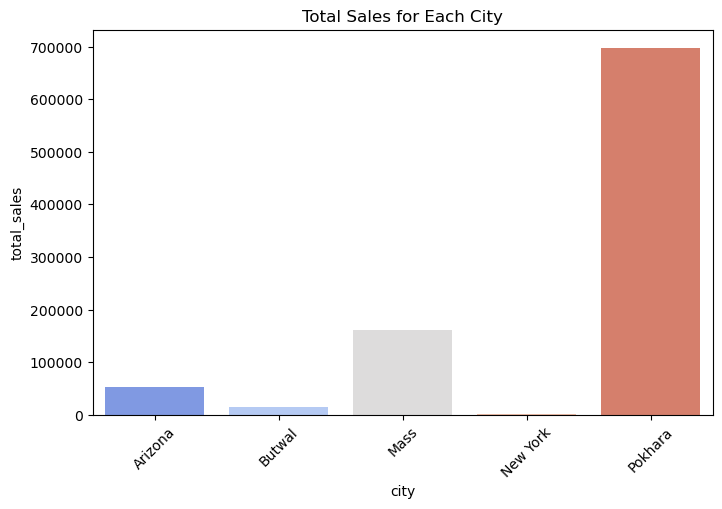

In [106]:
# Running the SQL query and storing the results in a DataFrame
query = "SELECT city, SUM(spent) AS total_sales FROM users GROUP BY city"
df_sales = pd.read_sql(query, conn)

# Plotting the Data
plt.figure(figsize=(8, 5))
sns.barplot(x="city", y="total_sales", data=df_sales, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Total Sales for Each City")
plt.show()

# 7. Closing the SQL connection

In [111]:
conn.close()